# Intelligent Supplier Evaluation & Selection
Problem Description: What is the problem/ issue that is addressed and how is it approached today?
Supplier Evaluation and selection play an important role in Procurement. There is so much information gathered in enterprise for the decision making and it needs to be utilized efficiently to maximize the benefits. The value proposition of benefits is varied across the customer segments.

There is no process that can help predict the best possible characteristics and then maximize the benefits during the Supplier selection process.

# Multi output regression

In [106]:
# Reference: https://machinelearningmastery.com/multi-output-regression-models-with-python/
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsRegressor
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [107]:
dataDf = pd.read_csv('Supplier Charateristics.csv', ",")
dataDf

,Current Price,Quality,Delivery,Service
0,3500,9,8,9
1,3800,10,9,9
2,3300,8,7,8
3,3600,8,9,8
4,3700,10,10,9
5,3400,8,8,8
6,3600,9,9,8
7,3800,10,10,9
8,3400,8,8,7
9,3600,8,8,9


In [108]:
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Current Price  42 non-null     int64
 1   Quality        42 non-null     int64
 2   Delivery       42 non-null     int64
 3   Service        42 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


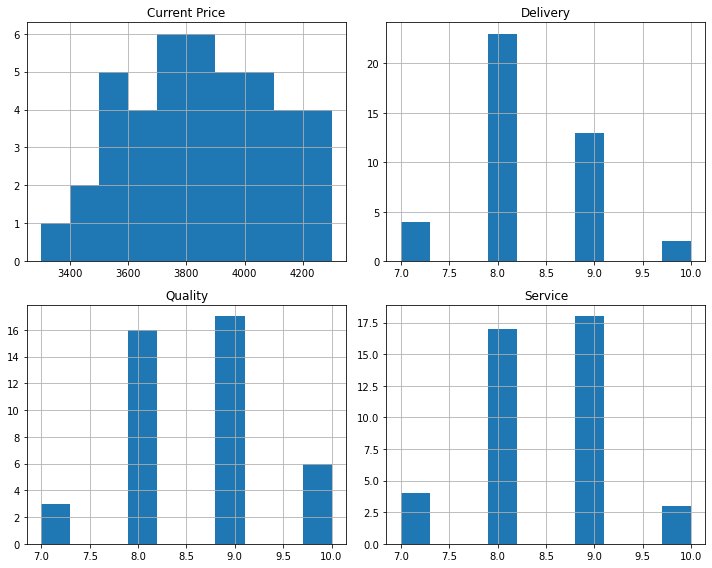

In [109]:
dataDf.hist(figsize=(10,8))
plt.tight_layout()

In [110]:
X = dataDf.drop(columns=['Quality', 'Delivery', 'Service'],axis=1)
y = dataDf[['Quality', 'Delivery', 'Service']]
X

,Current Price
0,3500
1,3800
2,3300
3,3600
4,3700
5,3400
6,3600
7,3800
8,3400
9,3600


In [111]:
y

,Quality,Delivery,Service
0,9,8,9
1,10,9,9
2,8,7,8
3,8,9,8
4,10,10,9
5,8,8,8
6,9,9,8
7,10,10,9
8,8,8,7
9,8,8,9


In [112]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x

,Current Price
23,3700
18,3800
3,3600
25,4200
33,4000
21,3800
19,4000
11,3500
2,3300
24,3900


# Linear Regression for Multioutput Regression

In [113]:
#Linear regression 
model = LinearRegression()
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 


print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[8.42174187 8.20321868 8.31397917]
 [8.5850426  8.25497002 8.49952666]
 [8.25844115 8.15146734 8.12843168]
 [9.2382455  8.46197539 9.24171663]
 [8.91164405 8.3584727  8.87062165]]
Mean Absolute Error on train dataset :  0.5536622138073698
Mean Squared Error on train dataset :  0.6975854678029937


In [114]:
test_x

,Current Price
16,3900
20,3500
39,4100
31,4300
10,3800
15,3800
17,3600
34,4100
40,4200


In [115]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[8.74834333 8.30672136 8.68507416]
 [8.09514042 8.099716   7.94288419]
 [9.07494478 8.41022405 9.05616914]
 [9.40154623 8.51372673 9.42726412]
 [8.5850426  8.25497002 8.49952666]]
Mean Absolute Error on test dataset :  0.44374905040730245
Mean Squared Error on test dataset :  0.5276561680597154


In [116]:
testData = pd.DataFrame([[3800]])
predict_test = model.predict(testData)
predict_test

array([[8.5850426 , 8.25497002, 8.49952666]])

In [117]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  9
Delivery =  8
Service =  8


# k-Nearest Neighbors for Multioutput Regression

In [118]:
# KNN algorithm
model = KNeighborsRegressor()
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[8.2 8.4 8.2]
 [9.2 9.  8.8]
 [8.2 8.6 8.4]
 [9.2 8.2 9.4]
 [9.  8.  8.6]]
Mean Absolute Error on train dataset :  0.48686868686868673
Mean Squared Error on train dataset :  0.6378625924669723


In [119]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[8.2 8.4 8.4]
 [8.  7.8 7.8]
 [9.2 8.2 9. ]
 [9.2 8.2 9.4]
 [9.2 9.  8.8]]
Mean Absolute Error on test dataset :  0.43703703703703695
Mean Squared Error on test dataset :  0.5643744488533465


In [120]:
testData = pd.DataFrame([[3800]])
predict_test = model.predict(testData)
predict_test

array([[9.2, 9. , 8.8]])

In [121]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  9
Delivery =  9
Service =  9


# Decision Tree for Multioutput Regression

In [122]:
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('Mean and Std Dev: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean and Std Dev: 0.563 (0.064)


In [123]:
# predict the target on the train dataset
model.fit(train_x, train_y)
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[ 8.16666667  8.16666667  8.16666667]
 [ 9.25        9.          8.75      ]
 [ 8.33333333  8.66666667  8.33333333]
 [10.          8.          9.        ]
 [ 9.          8.          8.6       ]]
Mean Absolute Error on train dataset :  0.43333333333333335
Mean Squared Error on train dataset :  0.6046954321446174


In [124]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[ 8.25  8.5   8.5 ]
 [ 8.    7.75  8.  ]
 [ 9.    8.5   9.5 ]
 [ 9.    8.   10.  ]
 [ 9.25  9.    8.75]]
Mean Absolute Error on test dataset :  0.388888888888889
Mean Squared Error on test dataset :  0.5400617248673217


In [125]:
testData = pd.DataFrame([[3800]])
predict_test = model.predict(testData)
predict_test

array([[9.25, 9.  , 8.75]])

In [126]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  9
Delivery =  9
Service =  9


# Wrapper Multioutput Regression Algorithms

# Case 1: Direct Multioutput Regression
    Develop an independent model for each numerical value to be predicted. This assumes that the outputs are independent of each other, which might not be a correct assumption.
    
    Problem 1: Given 'Current Price', predict 'Quality'.
    Problem 2: Given 'Current Price', predict 'Delivery'.
    Problem 3: Given 'Current Price', predict 'Service'.

    The regression models designed for predicting one value for multioutput regression is to divide the multioutput regression problem into multiple sub-problems.

In [127]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.776 (0.168)


In [128]:
# predict the target on the train dataset
wrapper.fit(train_x, train_y)
predict_train = wrapper.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[7.39999853 7.58974643 7.78947412]
 [7.5999978  7.79487322 8.        ]
 [7.19999927 7.38461965 7.57894823]
 [8.39999486 8.61538035 8.84210353]
 [7.99999633 8.20512678 8.42105177]]
Mean Absolute Error on train dataset :  0.8193321611941459
Mean Squared Error on train dataset :  1.0163783934101054


c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [129]:
# predict the target on the test dataset
predict_test = wrapper.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[7.79999706 8.         8.21052588]
 [7.         7.17949287 7.36842235]
 [8.1999956  8.41025357 8.63157765]
 [8.59999413 8.82050713 9.05262941]
 [7.5999978  7.79487322 8.        ]]
Mean Absolute Error on test dataset :  0.7711006695671031
Mean Squared Error on test dataset :  0.9012096910878421


In [130]:
testData = pd.DataFrame([[3800]])
predict_test = wrapper.predict(testData)
predict_test

array([[7.5999978 , 7.79487322, 8.        ]])

In [131]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  8
Delivery =  8
Service =  8


# Case 2: Chained Multioutput Regression
    Problem 1: Given 'Current Price', predict 'Quality'.
    Problem 2: Given Current Price and Quality_Predicted, predict 'Delivery'.
    Problem 3: Given Current Price, Quality_Predicted, and Delivery_Predicted, predict 'Service'.
The order of the models may be based on the order of the outputs in the dataset (the default) or specified via the “order” 
argument. For example, order=[0,1] would first predict the oth output, then the 1st output, whereas an order=[1,0] would 
first predict the last output variable and then the first output variable in our test problem.        

In [132]:
from sklearn.multioutput import RegressorChain

model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.786 (0.176)


In [133]:
# predict the target on the train dataset
wrapper.fit(train_x, train_y)
predict_train = wrapper.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[ 8.80952671  7.0006021   9.51306672]
 [ 9.04762137  7.18980602  9.77017617]
 [ 8.57143205  6.81139818  9.25595727]
 [10.          7.9466217  10.79861398]
 [ 9.52381068  7.56821386 10.28439508]]
Mean Absolute Error on train dataset :  1.0358791311963307
Mean Squared Error on train dataset :  1.2392425377408447


c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [134]:
# predict the target on the test dataset
predict_test = wrapper.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[ 9.28571603  7.37900994 10.02728563]
 [ 8.33333739  6.62219426  8.99884782]
 [ 9.76190534  7.75741778 10.54150453]
 [10.23809466  8.13582562 11.05572344]
 [ 9.04762137  7.18980602  9.77017617]]
Mean Absolute Error on test dataset :  1.047762112263923
Mean Squared Error on test dataset :  1.2656700061400352


In [135]:
testData = pd.DataFrame([[3800]])
predict_test = wrapper.predict(testData)
predict_test

array([[9.04762137, 7.18980602, 9.77017617]])

In [136]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  9
Delivery =  7
Service =  10


# Model Metrics
Linear Regression:
 - Mean Absolute Error on test dataset :  0.44374905040730245
 - Mean Squared Error on test dataset :  0.5276561680597154
 
KNN
 - Mean Absolute Error on test dataset :  0.43703703703703695
 - Mean Squared Error on test dataset :  0.5643744488533465

Decision Tree
 - Mean Absolute Error on test dataset :  0.388888888888889
 - Mean Squared Error on test dataset :  0.5400617248673217

Direct Multioutput Regression
 - Mean Absolute Error on test dataset :  0.7711006695671031
 - Mean Squared Error on test dataset :  0.9012096910878421

Chained Multioutput Regression
 - Mean Absolute Error on test dataset :  1.047762112263923
 - Mean Squared Error on test dataset :  1.2656700061400352